# ∂

diego domenzain

5.2025

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def fornberg_weights(x0, x, m):
  """
  https://scicomp.stackexchange.com/questions/480/how-can-i-numerically-differentiate-an-unevenly-sampled-function#481

  https://faculty.washington.edu/rjl/fdmbook/matlab/fdcoeffF.m

  https://www.ams.org/journals/mcom/1988-51-184/S0025-5718-1988-0935077-0/S0025-5718-1988-0935077-0.pdf

  https://www.siue.edu/~juliu/teaching/2018Summer/papers/Calculation%20of%20weights%20in%20finite%20difference%20formulas.pdf

  Compute finite difference weights using Fornberg's method.
  
  Parameters:
    x0: float - the location where derivative is to be approximated
    x: array_like - stencil nodes (length n)
    m: int - order of derivative to approximate (e.g., m=1 for first derivative)
  
  Returns:
    weights: np.ndarray of shape (n,) - weights for each x[i] to approximate f^(m)(x0)
  """
  n = len(x)
  c = np.zeros((n, m+1))
  c[0, 0] = 1.0
  c1 = 1.0
  for i in range(1, n):
    c2 = 1.0
    for j in range(i):
      c3 = x[i] - x[j]
      c2 *= c3
    for j in range(i):
      c4 = x[i] - x[j]
      for k in range(min(i, m), 0, -1):
        c[i, k] = ((x0 - x[j]) * c[i-1, k] - k * c[i-1, k-1]) / c4
      c[i, 0] = (x0 - x[j]) * c[i-1, 0] / c4
    for k in range(min(i, m), 0, -1):
      c[j, k] = ((x0 - x[i]) * c[j, k] + k * c[j, k-1]) / c2
    c[j, 0] = (x0 - x[i]) * c[j, 0] / c2
  return c[:, m]

In [ ]:
# Example: approximate f'(t) for f(t) = sin(log(t))
nt = 100
t = np.logspace(0.1, 2, nt)
f = np.sin(np.log(t))

# Choose derivative point indices (e.g., central points to avoid boundary issues)
stencil_size = 5  # number of points in stencil
m = 1       # first derivative
f_prime_numeric = np.zeros_like(t)

half = stencil_size // 2
for i in range(half, nt - half):
  x_stencil = t[i - half:i + half + 1]
  f_stencil = f[i - half:i + half + 1]
  weights = fornberg_weights(t[i], x_stencil, m)
  f_prime_numeric[i] = np.dot(weights, f_stencil)

# Compare with analytical derivative
f_prime_true = np.cos(np.log(t)) / t

In [5]:
weights

array([0.26412061, 0.06674406, 0.01326601, 0.00056861, 0.47310603])

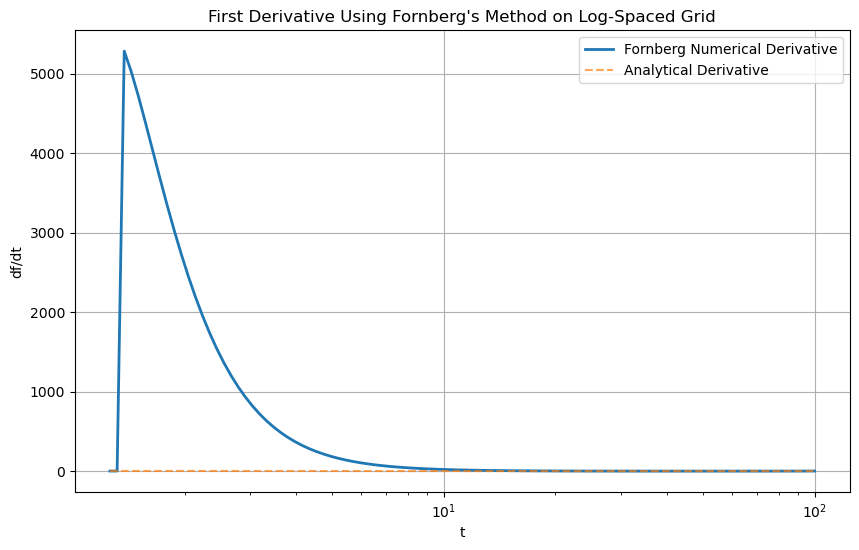

In [7]:
# Plot
plt.figure(figsize=(10, 6))
plt.plot(t, f_prime_numeric, label="Fornberg Numerical Derivative", lw=2)
plt.plot(t, f_prime_true, '--', label="Analytical Derivative", alpha=0.7)
plt.xscale('log')
plt.xlabel("t")
plt.ylabel("df/dt")
plt.title("First Derivative Using Fornberg's Method on Log-Spaced Grid")
plt.legend()
plt.grid(True)
plt.show()

          fin